# Creating word cloud on scraped data (csv)
* Part 1: Keyword Extractions / Tokenisation functions
  * simple split, nltk tokenization
  * spacy, rake, yake keyword extractions
  * user-specified words only
* Part 2: Analysis with pandas & numpy - keywords extraction
* Part 3: Analysis with specified keywords only (simple list method)
* Side Note: Analyse with CSV without pandas

## Part 1: Keyword Extractions / Tokenisation functions
Functions for extracting keywords / tokenisation
  * simple split, nltk tokenization
  * spacy, rake, yake keyword extractions
  * user-specified words only

In [54]:
def simple_split(text):
    return text.split()

In [55]:
import nltk

def nltk_tokens(text):
    return nltk.word_tokenize(text)

In [56]:
from rake_nltk import Rake

rake_nltk_var = Rake()

def rake_keywords(text):
    rake_nltk_var.extract_keywords_from_text(text)
    return rake_nltk_var.get_ranked_phrases()


In [57]:
import yake

kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

def yake_keywords(text):
    keywords = custom_kw_extractor.extract_keywords(text)
    word_list = []
    for kw in keywords:
        word_list.append(kw[0])
    return word_list

In [58]:
import spacy
# run if not yet install: !spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

def spacy_keywords(text):
    doc = nlp(text)
    return list(doc.ents)

Further removing words that are less useful / word stemming

In [59]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

#nltk.download("punkt")
#nltk.download('stopwords')
stemmer = SnowballStemmer("english",)

stop_words = stopwords.words('english')
ignore_words = ['hong kong','hong','kong','hong kong based', 'china','asia','apac',
                'english','mandarin','cantonese','chinese', 'putonghua',
                'provide','support','services','work','working', 'apply now',
                'one','first','ey','business','job','limited','strong','group'
                'responsibilities','description','job description','skills',
                'hsbc','cathay pacific','bloomberg']

In [60]:
def list_to_freq_dictionary(word_list, stop_words=[]):
    dict={}
    for word in word_list:
        word = str(word)
        word = re.sub('[^a-zA-Z0-9\n\']', ' ', word).lower().strip()
        if (word not in stop_words) & (word != ''):
            # word = stemmer.stem(word)
            dict[word] = dict.get(word, 0) + 1
    return dict

#### SPECIAL: Analyse on User-defined keywords only

Define some list on targeted word / phrase (max 4 words) in lowercase

In [61]:
action = ['develop','write','communicat','present','design','lead','troubleshoot','install','implement','coach','research']

role = ['business requirement','technical requirement','business and technical requirement',
        'system enhance','system updat','system requirement','manual','integrat','document',
        'change manag','change control','quality','test','data min','visuali','big data']

skills = ['degree','information technology','computer science','computer engineering','actuarial','cybersecurity', 'business stud',
          'mathematics','statistics','social science','quantitative analy','agile','waterfall','sdlc','nfrs',
          'six sigma','six-sigma','pmp','cfa', 'cissp','cisa','cism','ceh', 'accounting','isp','sa&d','insurance','bank',
          'automation','ai','machine learning','deep learning','video analy','natual language process','data analy', 'data model',
          'business analysis','security','api','stream','iot','rpa','rfid','cloud']

In [62]:
tools = ['ms sql','mssql','postgresdb','pgdb','mongodb','redis','oracle',
         'pentaho etl', 'hcm','crm','sap','salesforce','erp', 'test automation','automated test',
         'linux','windows','ci/cd', 'aws', 'lambda','rds','eks','sqs','hortonworks', 'cloudera','azure','sql','aks','event hub',
         'fidessa', 'toms' ,'middlex','wms','tms','informatica', 'ssis', 'sass','talend', 'datastage','nifi',
          'k8s','docker','hadoop','excel','access','powerpoint','powerbi','power bi','git','cornerstone'
         'looker','MS office','bi application','bi platform','tableau','qlikview','visio','mockup plus',
         'kdb+','influxdb','azure cloud','google analytics','google data studio','alteryx','Monarch','devops','jenkins','redshift']

In [63]:
coding = ['angular','react native','react','nosql','q/kdb','kdb+/q','MS SQL','power query','nodejs','node.js','VBA'
          'A.NET', 'A#','A sharp','A-0 System','A+','A plus','ABAP','Action!','ActionScript','Actor','Ada','Adenine',
          'AMOS','AMPL','Analitik','AngelScript','Apache Pig latin','Apex','APL','App Inventor','AppleScript','APT','Arc',
          'ARexx','Argus','Assembly language','ASM','AutoIt','AutoLISP','Visual LISP','Averest','AWK','Axum',
          'Bash','Batch file','bc','BCPL','BeanShell','Bertrand','BETA','BLISS','Blockly','BlooP','Boo','Boomerang','Bosque',
          'C','C--','C++','C plus plus','C/C++','C*','C#','C/AL','C Shell','csh',
          'Caml','Chapel','ChucK','Cilk','Clipper','CLIPS','CLIST','CobolScript','COBOL','Cobra','CoffeeScript','ColdFusion',
          'COMAL','COMIT','Curry','Cybil','Cyclone','Cypher','Cython','CEEMAC',
          'D','Dart','Darwin','DataFlex','Datalog','DATATRIEVE','dBase','Delphi','DinkC','DIBOL','Dylan','DYNAMO','DAX',
          'Euler','Euphoria','EusLisp','CMS EXEC','EXEC','Executable UML','Ezhil',
          'F','F#','F sharp','F*','Factor','Fantom','FAUST','FFP','FoxBase','FoxPro',
          'Game Maker','GameMonkey','GAMS','G-code','GDScript','Godot','Genie','GDL','OpenGL','GNU E','GNU Guile',
          'GoLang','Go!','Google Apps Script','Grasshopper','Groovy',
          'IBM Basic assembly language','IBM HAScript','IBM Informix','IBM RPG','IDL','Idris','ISLISP',
          'J','J#','J sharp','J++','J plus plus','JADE','Jai','JAL','Janus','Janus','JASS','Java','JavaFX Script','JavaScript',
          'JScript','JScript .NET','Julia','Jython',
          'Maya','MEL','MDL','Mercury','Mesa','MHEG-5','Microcode','MicroScript','Microsoft Power Fx','MIIS','Milk',
          'MIMIC','Mirah','Miranda','MIVA Script','ML','Model 204','Modelica','Modula','Mohol',
          'NASM','NESL','Net.Data','NPL','Not eXactly C','NXC','Not Quite C','NQC','NSIS','Nu','NWScript','NXT-G',
          'OBJ2','Object Lisp','ObjectLOGO','Object REXX','Object Pascal','Objective-C','Objective C','Objective-J',
          'Octave','OmniMark','Opa','Opal','OpenCL','OpenEdge ABL','OPL',
          'ParaSail','PARI/GP','Pascal','PEARL','PeopleCode','Perl','PDL','Pharo','PHP','Pico','Picolisp','Pict','Pike','PILOT',
          'PL-11','PL/0','PL/B','PL/C','PL/I – ISO 6160','PL/M','PL/P','PL/S','PL/SQL','PL SQL','PL360','PLANC','Plankalkül',
          'Powerhouse','PowerBuilder','PowerShell','PPL','Processing.js','Prolog','PROMAL','Promela','Pure Data','PureScript','Python',
          'Q','Q#','Qalb','Quantum','QtScript','QuakeC','QPL','.QL',
          'R','R++','rc','Reason','REBOL','Red','Redcode','Rlab','ROOP','RPG','RPL','RSL','RTL/2','Ruby','Rust',
          'S','S2','S3','S-Lang','S-PLUS','SA-C','SabreTalk','SAIL','SAKO','SAS','SASL','Scala','Scilab','Script.NET','SIMSCRIPT',
          'Simula','Simulink','SISAL','Smalltalk','SML','Strongtalk','Snap!','Snowball','SOL','Solidity','SPARK','SP/k','SPS',
          'SQL','SQR','Squeak','Squirrel','SR','S/SL','Strand','Stata','Stateflow','SuperTalk','Swift','SYMPL','SystemVerilog',
          'TECO','TELCOMP','TeX','T-SQL','Transact-SQL','Transcript','TTCN','Turing','TUTOR','TXL','TypeScript','Tynker',
          'UNITY','UnrealScript','Vim script','Viper','Ethereum','Ether','ETH','Visual DataFlex','Visual DialogScript','Visual FoxPro',
          'Visual J++','Visual J plus plus','Visual LISP','Visual Objects','Visual Prolog',
          'XQuery','XSB','XSharp','X#','XSLT','Xtend','Yorick','YQL','Yoix','Z notation','Z shell','ZPL','Z++']
coding = list(x.lower() for x in coding)

##### Analyse with defined keywords
* create dictionary with keyword frequencies
* plot a word cloud and compare with previous result from packages

In [64]:
# Function for finding user-defined keywords in provided text (max 4 word combined phrase)
def specified_token(keyword, text):
    dict={}
    word_list = text.split()
    prev1 = ""
    prev2 = ""
    prev3 = ""
    for i, word in enumerate(word_list):
        w = word.lower().replace(',','')
        if w in keyword:
            dict[w] = dict.get(w,0)+1
        two_word = prev1+' '+w
        three_word = prev2+' '+w
        four_word = prev3+' '+w
        if (i>1) & (two_word in keyword):
            dict[two_word] = dict.get(two_word,0)+1
        if (i>1) & (three_word in keyword):
            dict[three_word] = dict.get(three_word,0)+1
        if (i>1) & (four_word in keyword):
            dict[four_word] = dict.get(four_word,0)+1
    return dict

# specified_token(action+role+skills+tools+coding, test)

## Part 2: Analysis with pandas & numpy - keywords extraction
* Read scraped data (csv) into pandas dataframe
* Data cleaning - word replacement & keyword extraction

In [65]:
import pandas as pd
import numpy as np
import os
file = os.path.join('output','data','Indeed.csv') #update filepath: data / (job title) / (filename.csv)

df = pd.read_csv(file)
df.head()

Unnamed: 0               key  searchTerm  \
0           0  4da652b267941362         NaN   
1           1  0803f5e9e4317913         NaN   
2           2  f4c6dc5ca0170627         NaN   
3           3  37274bbf4fca4ee3         NaN   
4           4  e867eb33f4d565e0         NaN   

                                            jobTitle  \
0  Enterprise Data - BQuant Enterprise Sales - Ho...   
1                           Data Entry Clerk (資料輸入員)   
2                                 Data Entry / 資料輸入員   
3                 Data Entry Clerk (1-Year Contract)   
4                                         Data Entry   

                                companyName  \
0                      Bloomberg841 reviews   
1     Primetech Technology Limited4 reviews   
2                          YesStyle.com Ltd   
3        CK Asset Holdings Limited2 reviews   
4  ACTMEDIA HOLDINGS (HONG KONG) CO LIMITED   

                                     companyLocation  \
0  Bloomberg841 reviews Bloomberg 841 reviews 841...   
1  Primetech Technology Limited4 reviews Primetec...   
2        YesStyle.com Ltd YesStyle.com Ltd Hong Kong   
3  CK Asset Holdings Limited2 reviews CK Asset Ho...   
4  ACTMEDIA HOLDINGS (HONG KONG) CO LIMITED ACTME...   

                                      jobDescription   postedDate  \
0  Interested in engaging with top quantitative f...  Just posted   
1  Primetech Technology Limited (“Primetech”) is ...   7 days ago   
2  YesStyle.com is the first online retailer in A...   6 days ago   
3  CK Asset Holdings Limited is one of the larges...   9 days ago   
4  Clerical work of operation teamData EntryPart-...   Report job   

                            jobTitle_cleaned jobLevel  salary  \
0  Enterprise Data - BQuant Enterprise Sales  General     NaN   
1                                 Data Entry  General     NaN   
2                                 Data Entry  General     NaN   
3                                 Data Entry  General     NaN   
4                                 Data Entry  General     NaN   

                                          JD_cleaned  \
0  Interested in engaging with top quantitative f...   
1  Primetech Technology Limited (“Primetech”) is ...   
2  YesStyle.com is the first online retailer in A...   
3  CK Asset Holdings Limited is one of the larges...   
4  Clerical work of operation teamData EntryPart-...   

                                     JD_requirements  \
0  in data science, quantitative investment strat...   
1  中學或以上程度 必須懂中文及英文打字 (中、英文打字每分鐘達20字以上) 必須懂電腦基本運用...   
2  HKDSE or above  Able to read and understand Si...   
3  [NO REQ]| CK Asset Holdings Limited is one of ...   
4  [NO REQ]| Clerical work of operation teamData ...   

                                         JD_benefits  \
0                                                NaN   
1                                                NaN   
2  5 Days Work  Dynamic, International Cultural &...   
3  attractive compensation package to the right c...   
4                                                NaN   

                                             JD_role  
0  Position our quant platform to prospective cli...  
1  Our clients are has a group of companies in As...  
2  Product data processing for merchandise base o...  
3                                                NaN  
4                                                NaN

### A) Analysis on Job Titles
#### 1. Keyword extraction

In [66]:
# Extract Keywords from cleaned job titles - experimenting different keyword extraction methods application
title_df = df.copy()
title_df['jobTitle_split'] = title_df['jobTitle_cleaned'].apply(simple_split)
title_df['jobTitle_nltk'] = title_df['jobTitle_cleaned'].apply(nltk_tokens)
title_df['jobTitle_rake'] = title_df['jobTitle_cleaned'].apply(rake_keywords)
title_df['jobTitle_yake'] = title_df['jobTitle_cleaned'].apply(yake_keywords)
title_df['jobTitle_spacy'] = title_df['jobTitle_cleaned'].apply(spacy_keywords)
#quick preview on result
title_df[['jobTitle','jobTitle_cleaned','jobTitle_split','jobTitle_nltk','jobTitle_rake','jobTitle_yake','jobTitle_spacy']].tail(5)

# word_list = [item for sublist in df['tmp2'].to_list() for item in sublist]

jobTitle  \
386  Assistant Vice President, Team Head, Business ...   
387  Junior Developer / System Analyst - IT Trainee...   
388  Business Analyst / Project Manager / Project E...   
389  Programmer / System Analyst / QA Specialist / ...   
390  AVP, Specialist , Business Analyst, Corporate ...   

                                      jobTitle_cleaned  \
386  Assistant Vice President, Team Head, Business ...   
387  Developer / System Analyst - IT Trainee / BI /...   
388  Business Analyst/ Project Manager / Project Ex...   
389  Programmer / System Analyst / QA Specialist / ...   
390  Assistant Vice President, Specialist , Busines...   

                                        jobTitle_split  \
386  [Assistant, Vice, President,, Team, Head,, Bus...   
387  [Developer, /, System, Analyst, -, IT, Trainee...   
388  [Business, Analyst/, Project, Manager, /, Proj...   
389  [Programmer, /, System, Analyst, /, QA, Specia...   
390  [Assistant, Vice, President,, Specialist, ,, B...   

                                         jobTitle_nltk  \
386  [Assistant, Vice, President, ,, Team, Head, ,,...   
387  [Developer, /, System, Analyst, -, IT, Trainee...   
388  [Business, Analyst/, Project, Manager, /, Proj...   
389  [Programmer, /, System, Analyst, /, QA, Specia...   
390  [Assistant, Vice, President, ,, Specialist, ,,...   

                                         jobTitle_rake  \
386  [business intelligence systems, assistant vice...   
387  [system analyst, project manager, business ana...   
388  [qa officer, project manager, project executiv...   
389  [system analyst, qa specialist, mobile develop...   
390  [assistant vice president, business analyst, s...   

                                         jobTitle_yake  \
386  [Business Intelligence Systems, Assistant Vice...   
387  [Project Manager, System Analyst, Business Ana...   
388  [Project Manager, Project Executive, Business ...   
389  [Mobile Developer, System Analyst, Business An...   
390  [Assistant Vice President, Business Analyst, V...   

                                        jobTitle_spacy  
386  [(Team, Head), (Business, Intelligence, Systems)]  
387  [(Trainee, /, BI, /, Business, Analyst, /, Pro...  
388  [(Business, Analyst/, Project, Manager, /, Pro...  
389  [(Programmer, /, System, Analyst, /, QA, Speci...  
390               [(Specialist, ,, Business, Analyst)]

In [67]:
# looks like Rake keyword extraction make more sense for job titles, applying to original dataframe df
df['jobTitle_keywords'] = df['jobTitle_cleaned'].apply(lambda x: rake_keywords(str(x)))

#### 2. Summarising for Keyword Frequencies

In [75]:
# Create a dataframe duplicating rows for each keywords
df2 = pd.DataFrame({'jobTitle':np.repeat(df.jobTitle.values, df.jobTitle_keywords.str.len()),
                        'jobTitle_keywords':np.concatenate(df.jobTitle_keywords.values)})

# Convert to dictionary with keyword frequencies
mydict = df2.groupby('jobTitle_keywords').size().sort_values(ascending=False).to_dict()
#mydict

#### 3.Visualize with word cloud

##### >> Generic function for plotting word cloud
(also used in later parts)

In [77]:
# Function for plotting graph
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

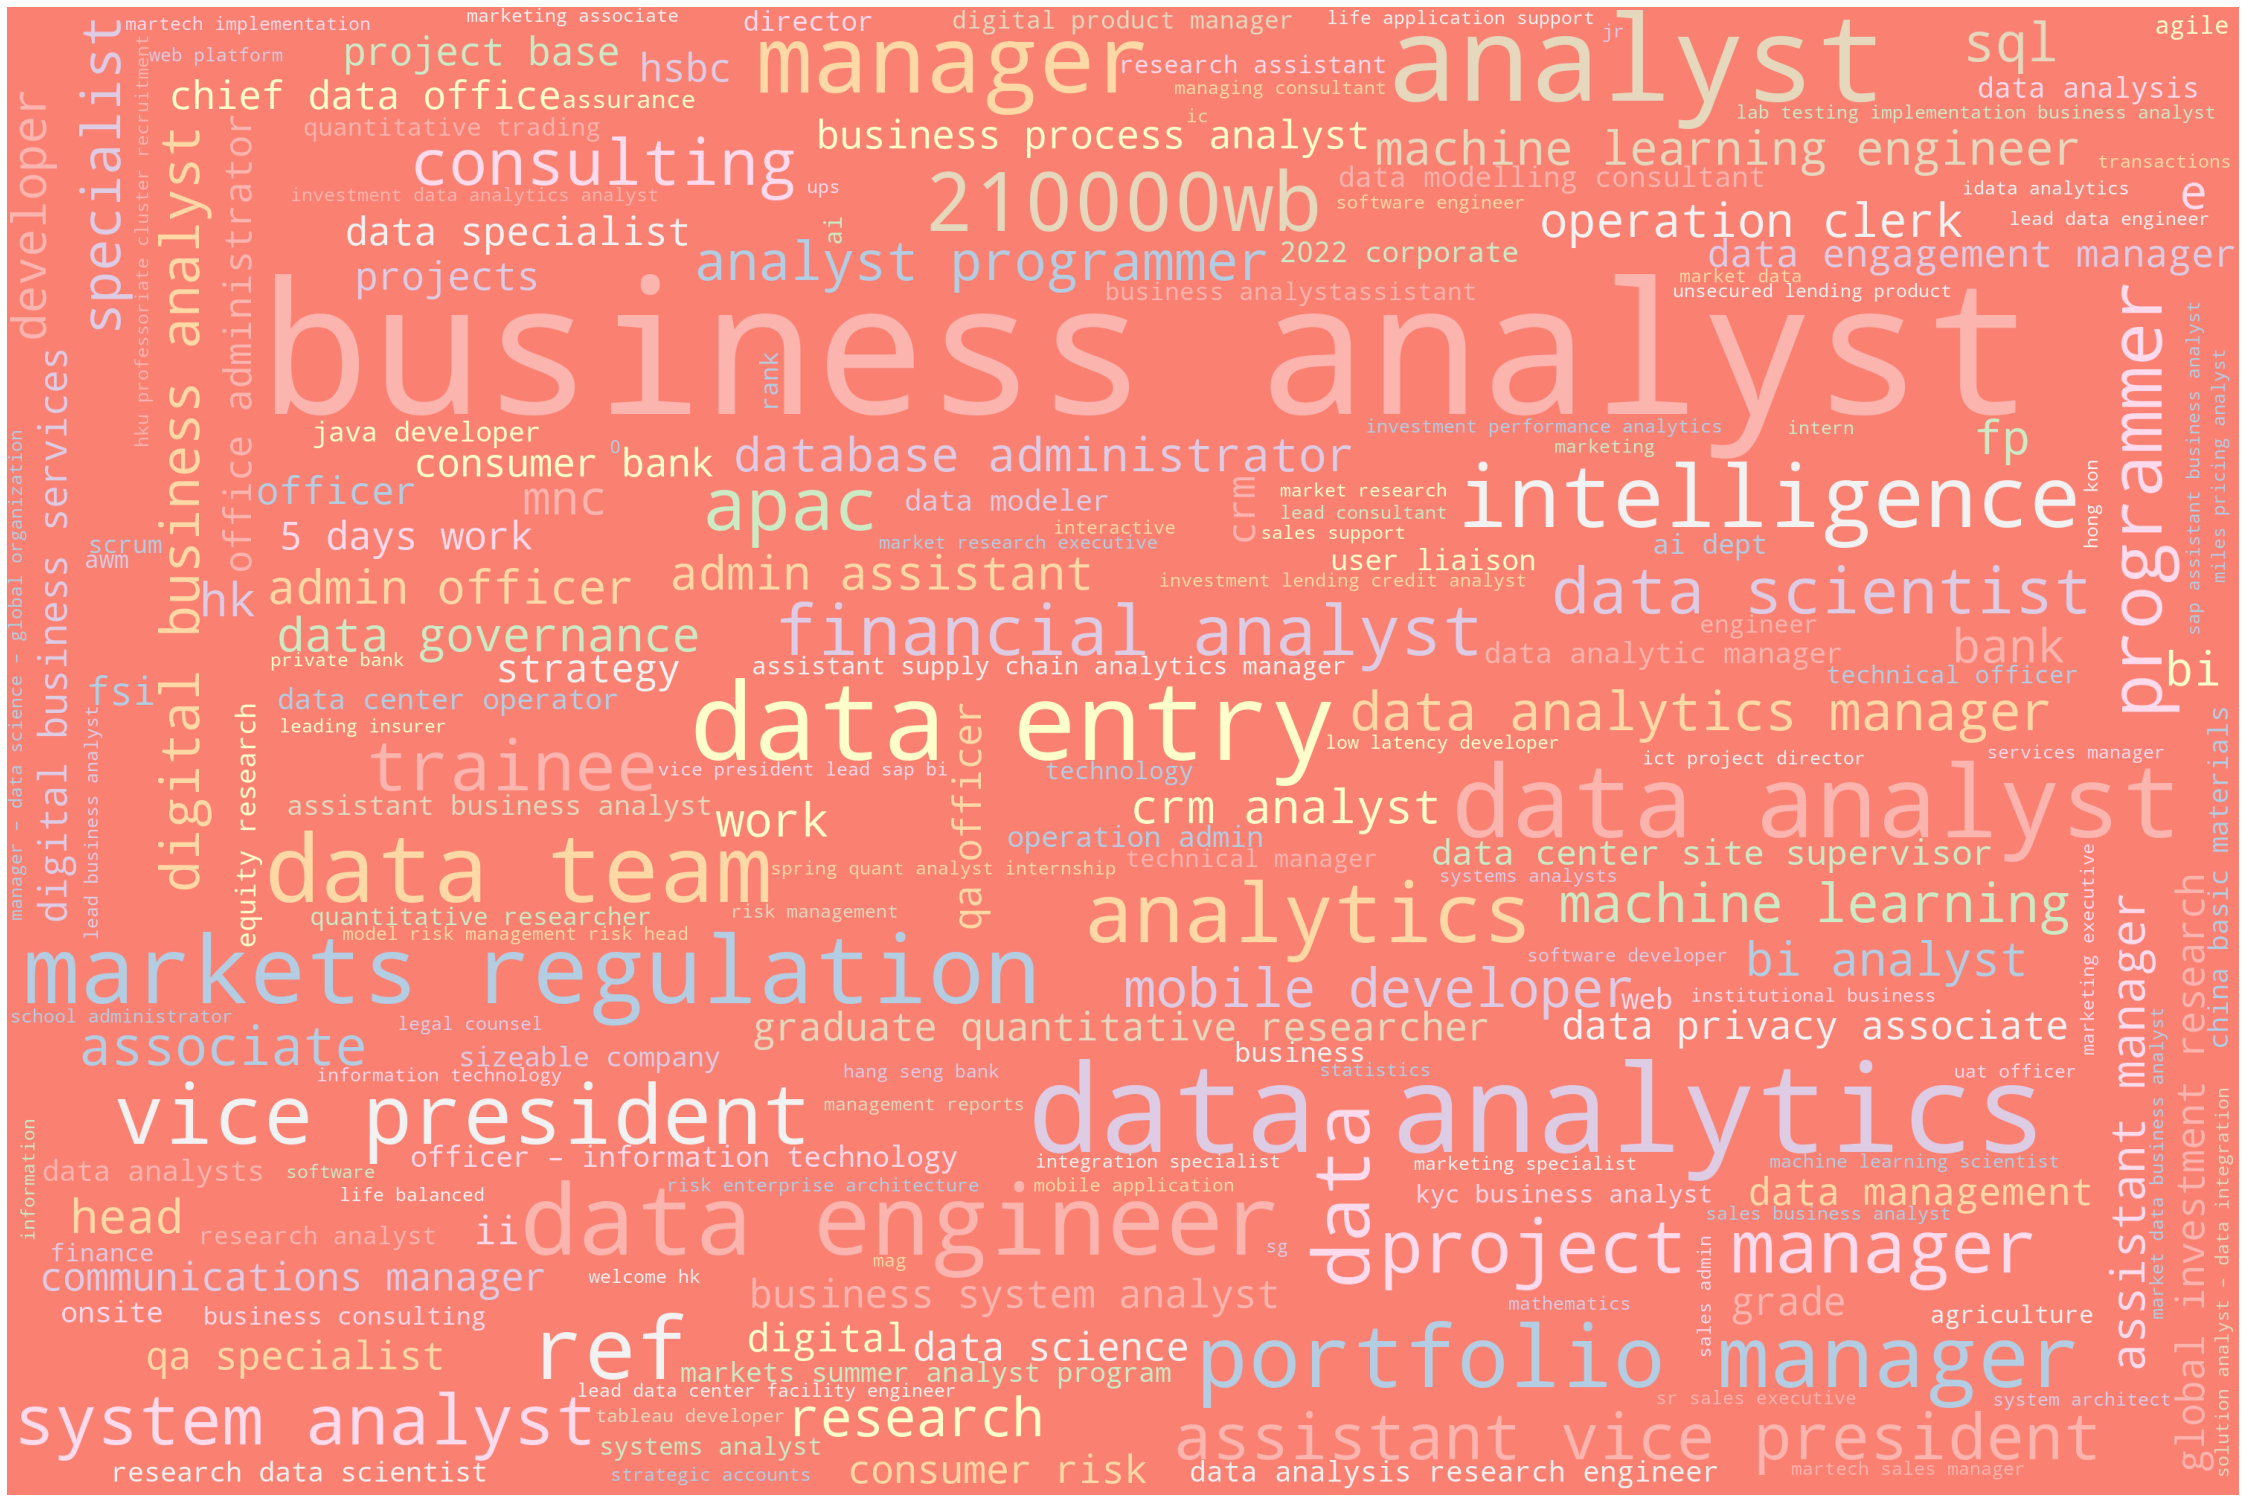

In [78]:
from wordcloud import WordCloud

# Plot a word cloud for job title keywords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False).generate_from_frequencies(mydict)
plot_cloud(wordcloud)

### B) Doing the Same on Job Descriptions

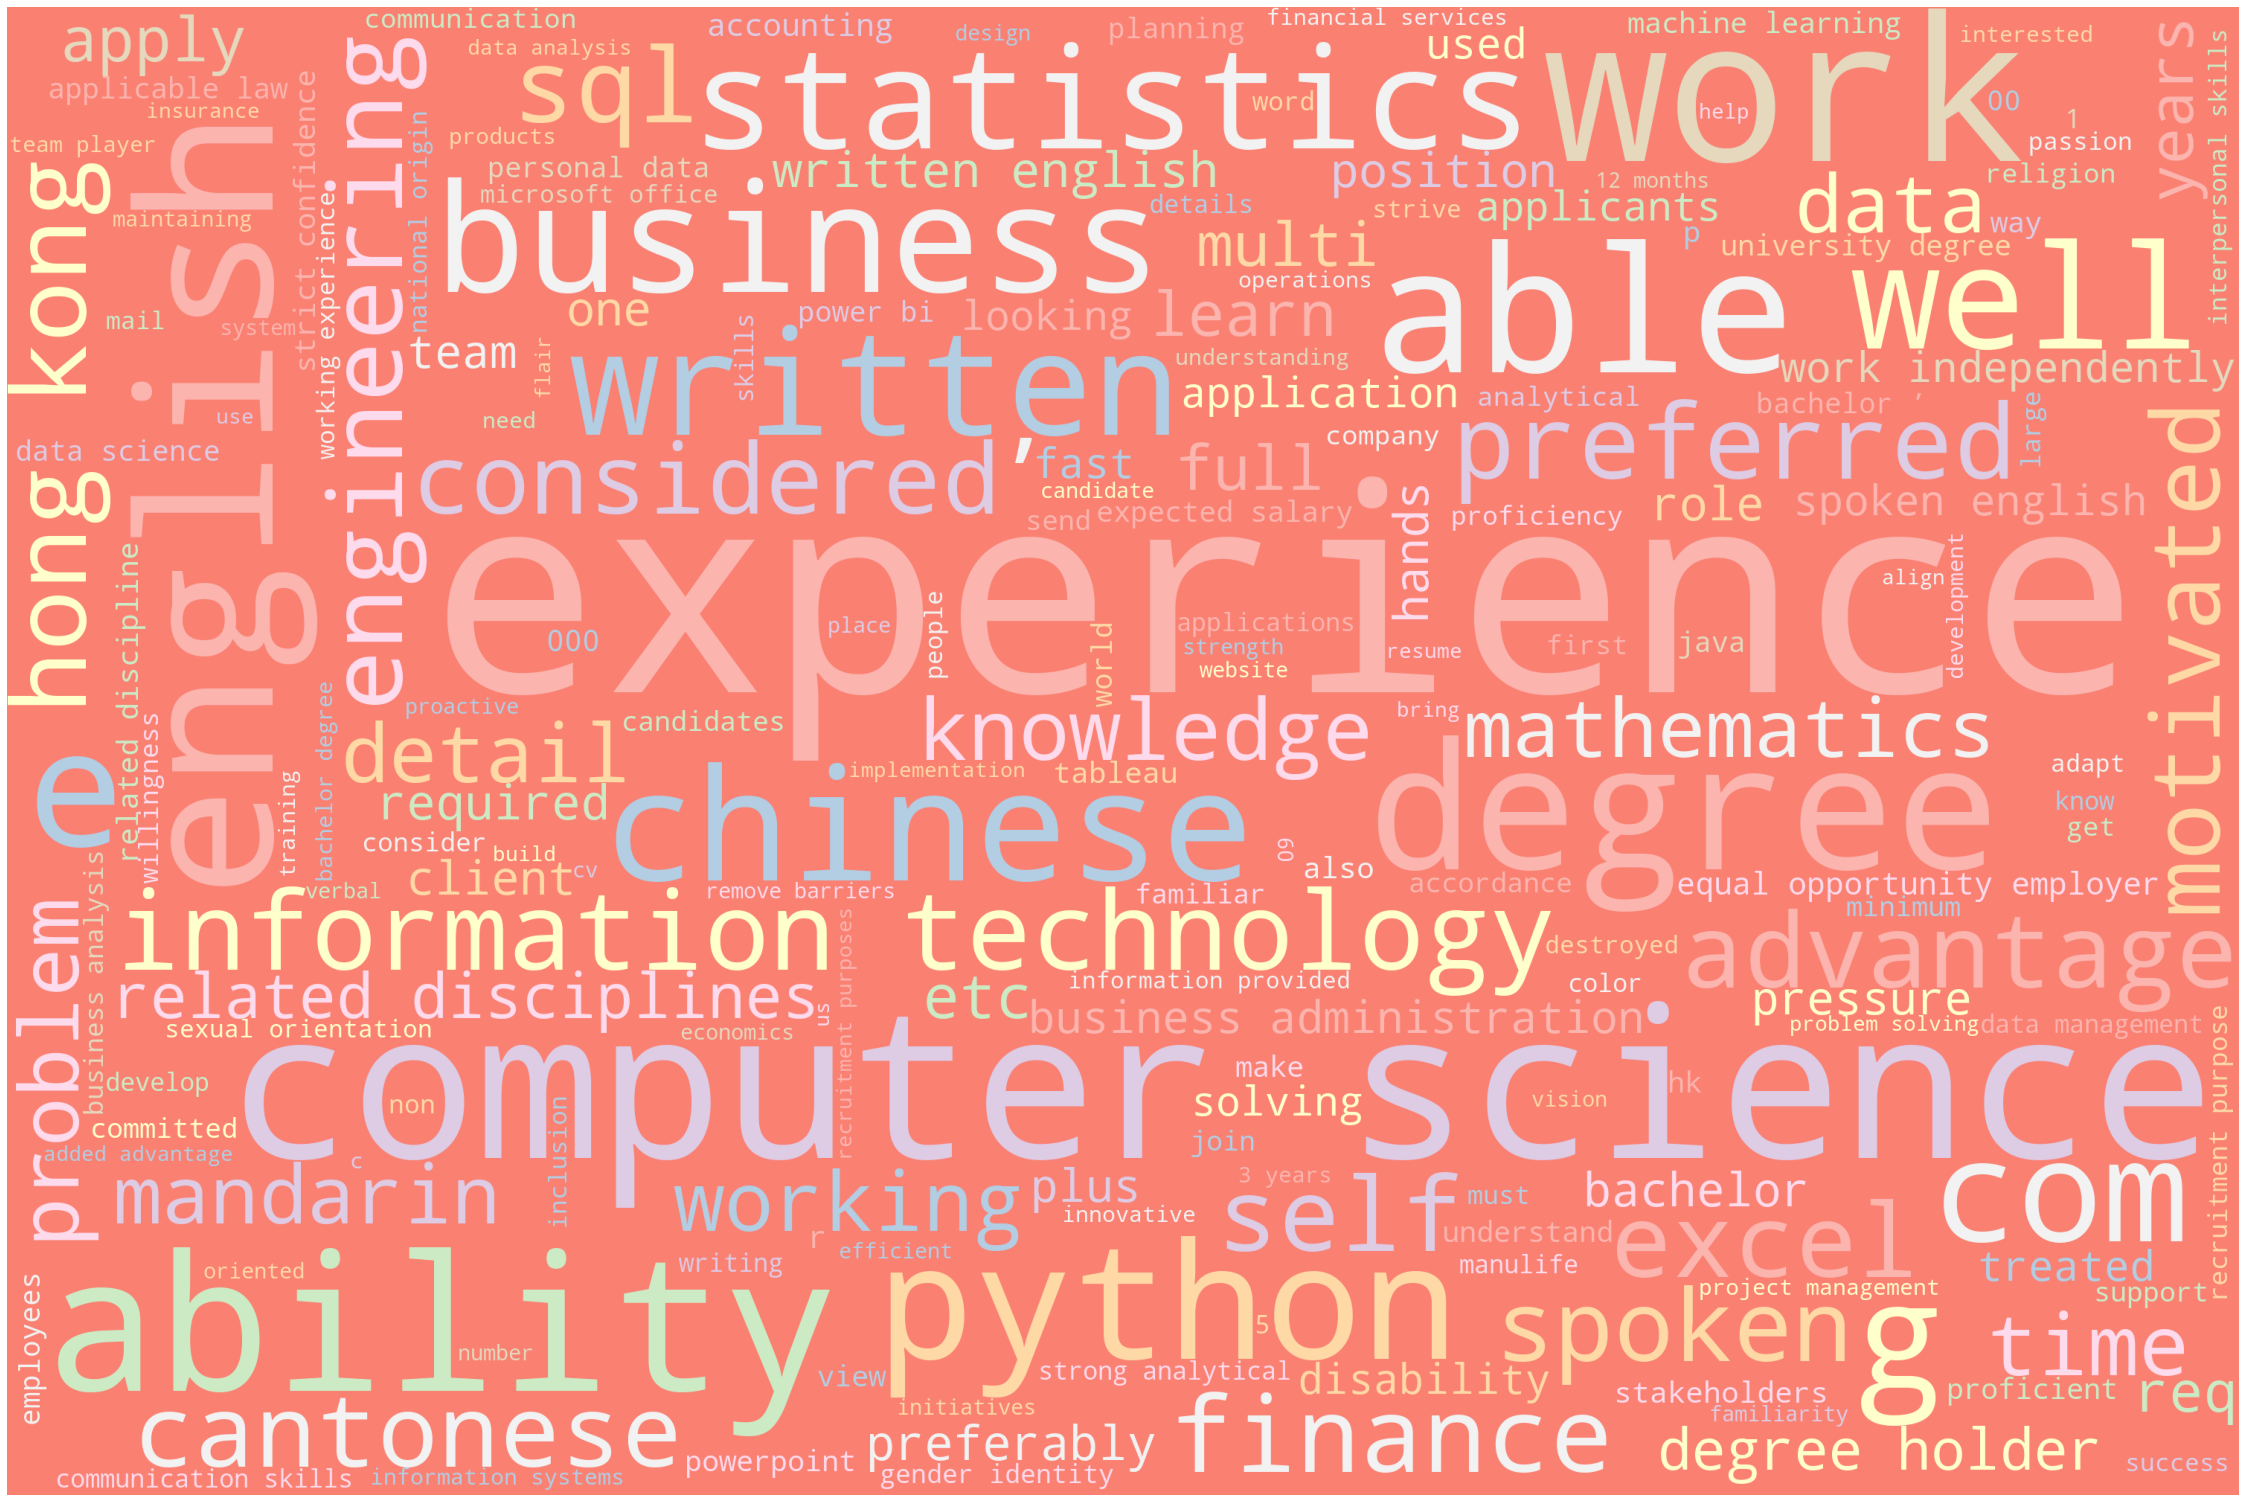

In [79]:
# Keyword extraction with Rake
df['JD_req_keywords'] = df['JD_requirements'].apply(lambda x: rake_keywords(str(x)))
df['JD_benifit_keywords'] = df['JD_benefits'].apply(lambda x: rake_keywords(str(x)))
df['JD_role_keywords'] = df['JD_role'].apply(lambda x: rake_keywords(str(x)))
 
# Create a dataframe duplicating rows for each keywords
df2 = pd.DataFrame({'jobTitle':np.repeat(df.jobTitle.values, df.JD_req_keywords.str.len()),
                        'JD_req_keywords':np.concatenate(df.JD_req_keywords.values)})

# Convert to dictionary with keyword frequencies
mydict = df2.groupby('JD_req_keywords').size().sort_values(ascending=False).to_dict()
#mydict

# Plot a word cloud for job title keywords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False).generate_from_frequencies(mydict)
plot_cloud(wordcloud)


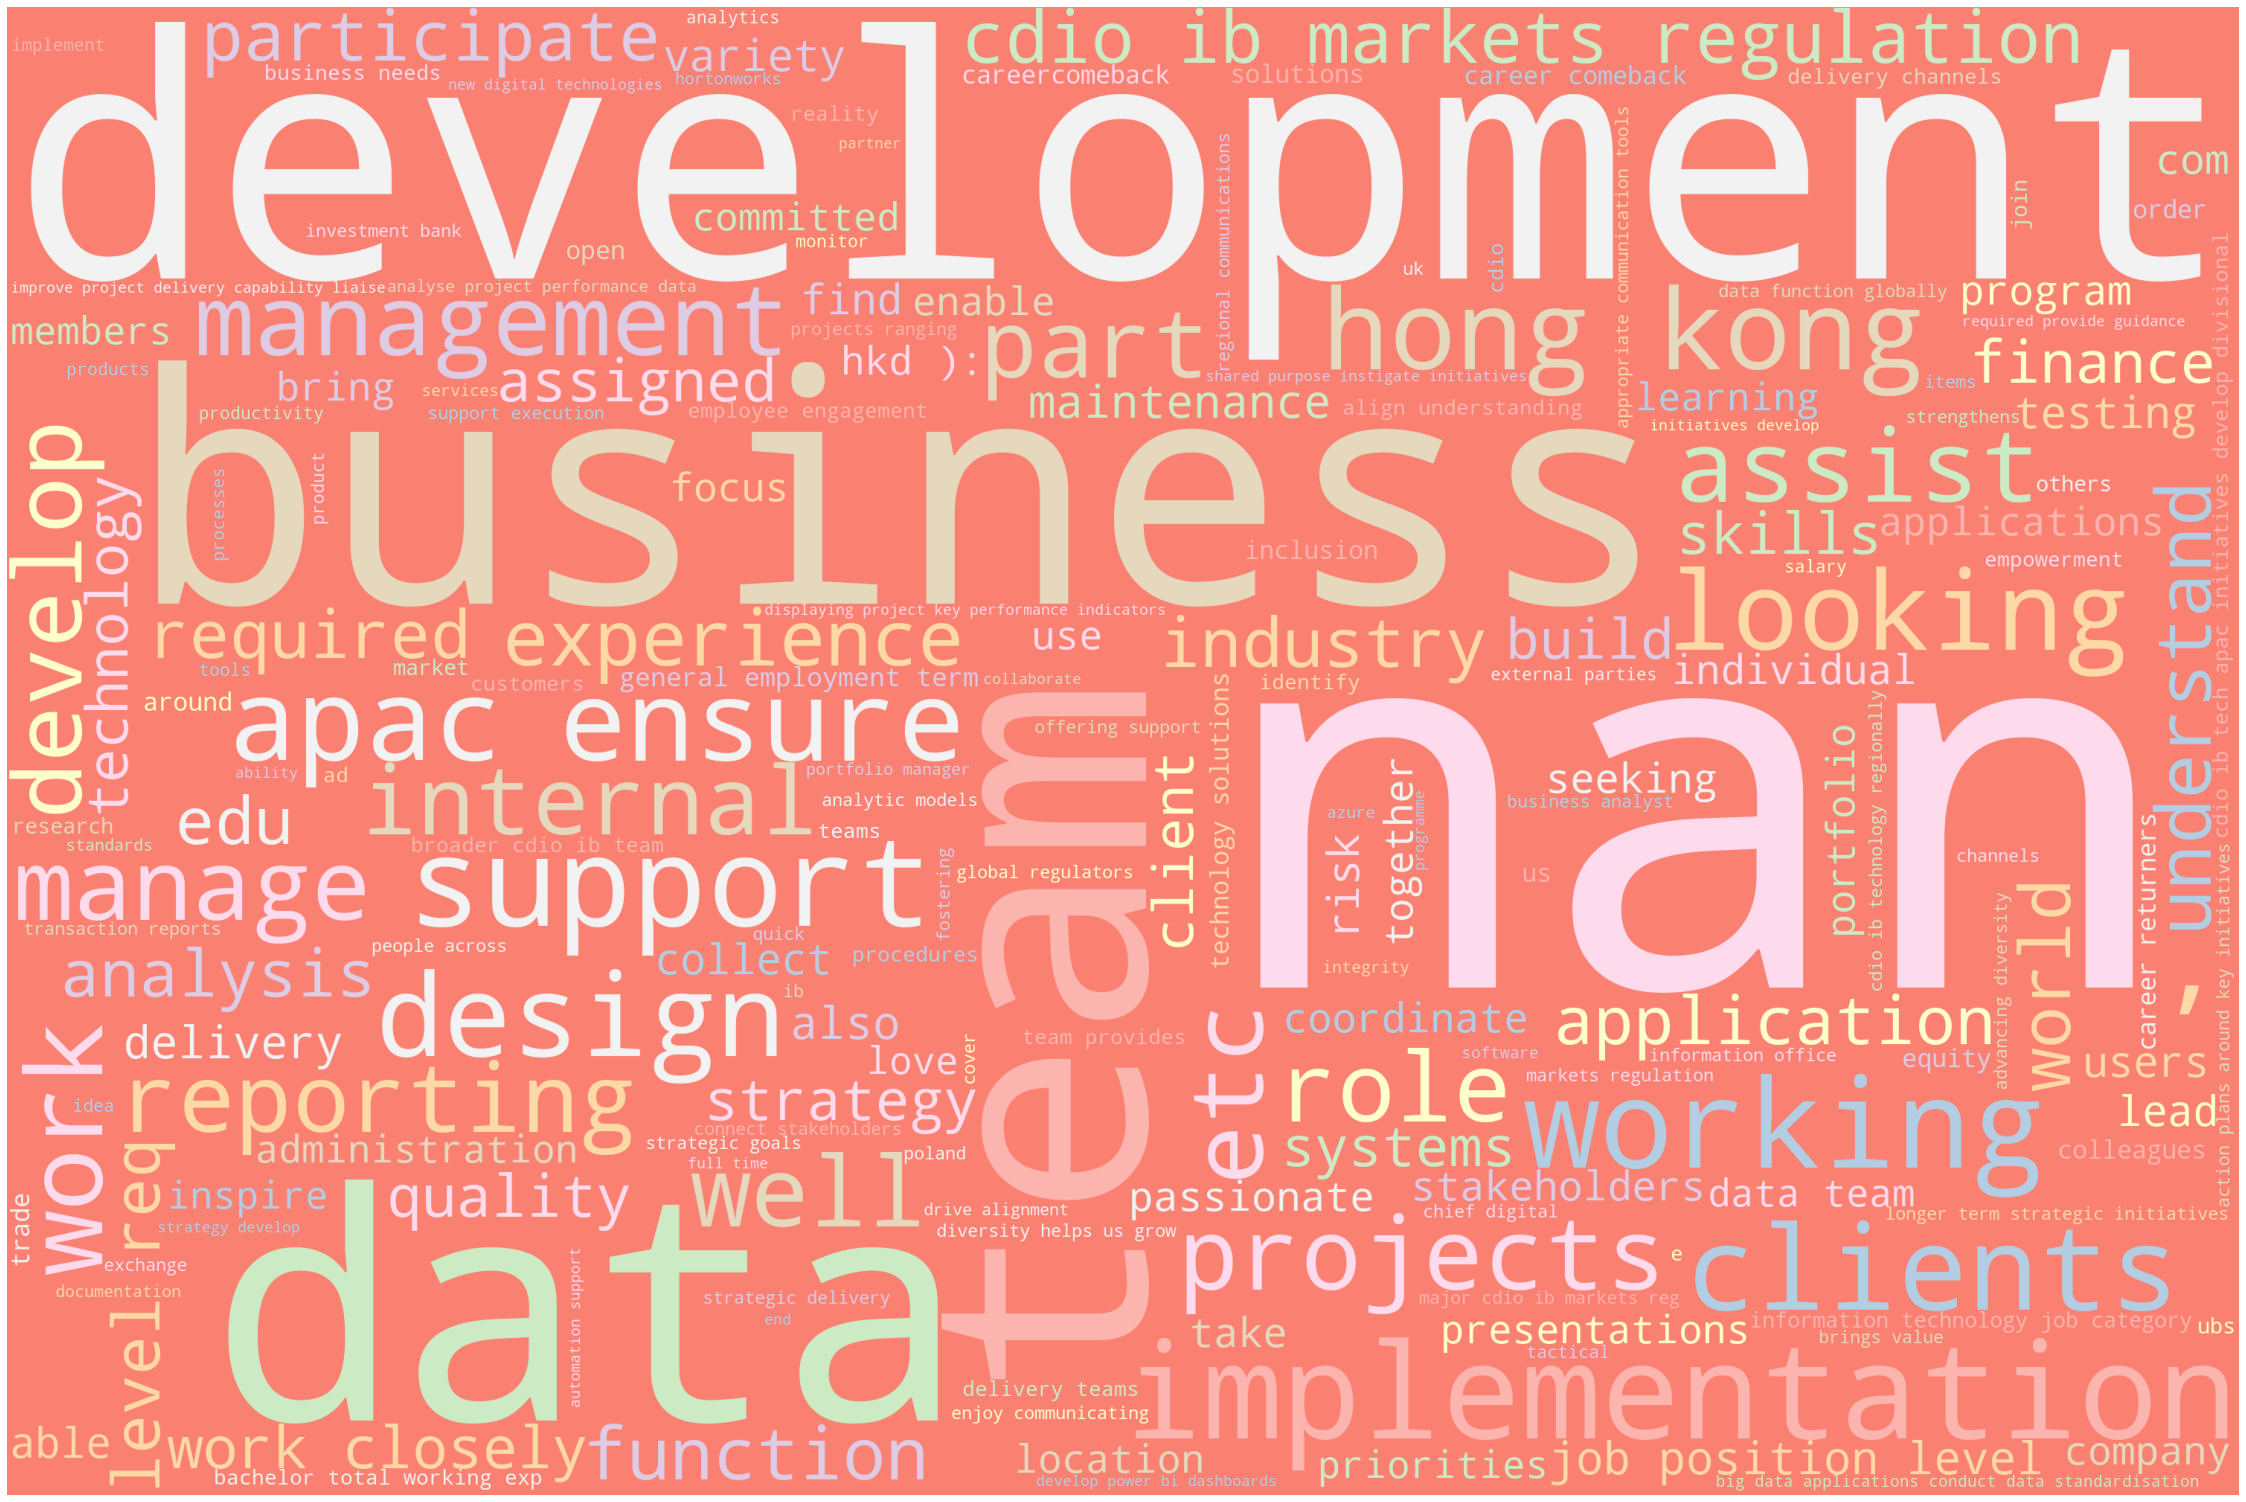

In [80]:
# Create a dataframe duplicating rows for each keywords
df2 = pd.DataFrame({'jobTitle':np.repeat(df.jobTitle.values, df.JD_role_keywords.str.len()),
                        'JD_role_keywords':np.concatenate(df.JD_role_keywords.values)})

# Convert to dictionary with keyword frequencies
mydict = df2.groupby('JD_role_keywords').size().sort_values(ascending=False).to_dict()
#mydict

# Plot a word cloud for job title keywords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False).generate_from_frequencies(mydict)
plot_cloud(wordcloud)

## Part 3: Analysis with specified keywords only (simple list method)
* create dictionary with keyword frequencies
* plot a word cloud and compare with previous result from packages

In [92]:
# Function for finding user-defined keywords in provided text (max 4 word combined phrase)
def specified_token(keyword, text):
    text = str(text)
    dict={}
    word_list = text.split()
    prev1 = ""
    prev2 = ""
    prev3 = ""
    for i, word in enumerate(word_list):
        w = word.lower().replace(',','')
        if w in keyword:
            dict[w] = dict.get(w,0)+1
        two_word = prev1+' '+w
        three_word = prev2+' '+w
        four_word = prev3+' '+w
        if (i>1) & (two_word in keyword):
            dict[two_word] = dict.get(two_word,0)+1
        if (i>1) & (three_word in keyword):
            dict[three_word] = dict.get(three_word,0)+1
        if (i>1) & (four_word in keyword):
            dict[four_word] = dict.get(four_word,0)+1
    return dict

# specified_token(action+role+skills+tools+coding, test)

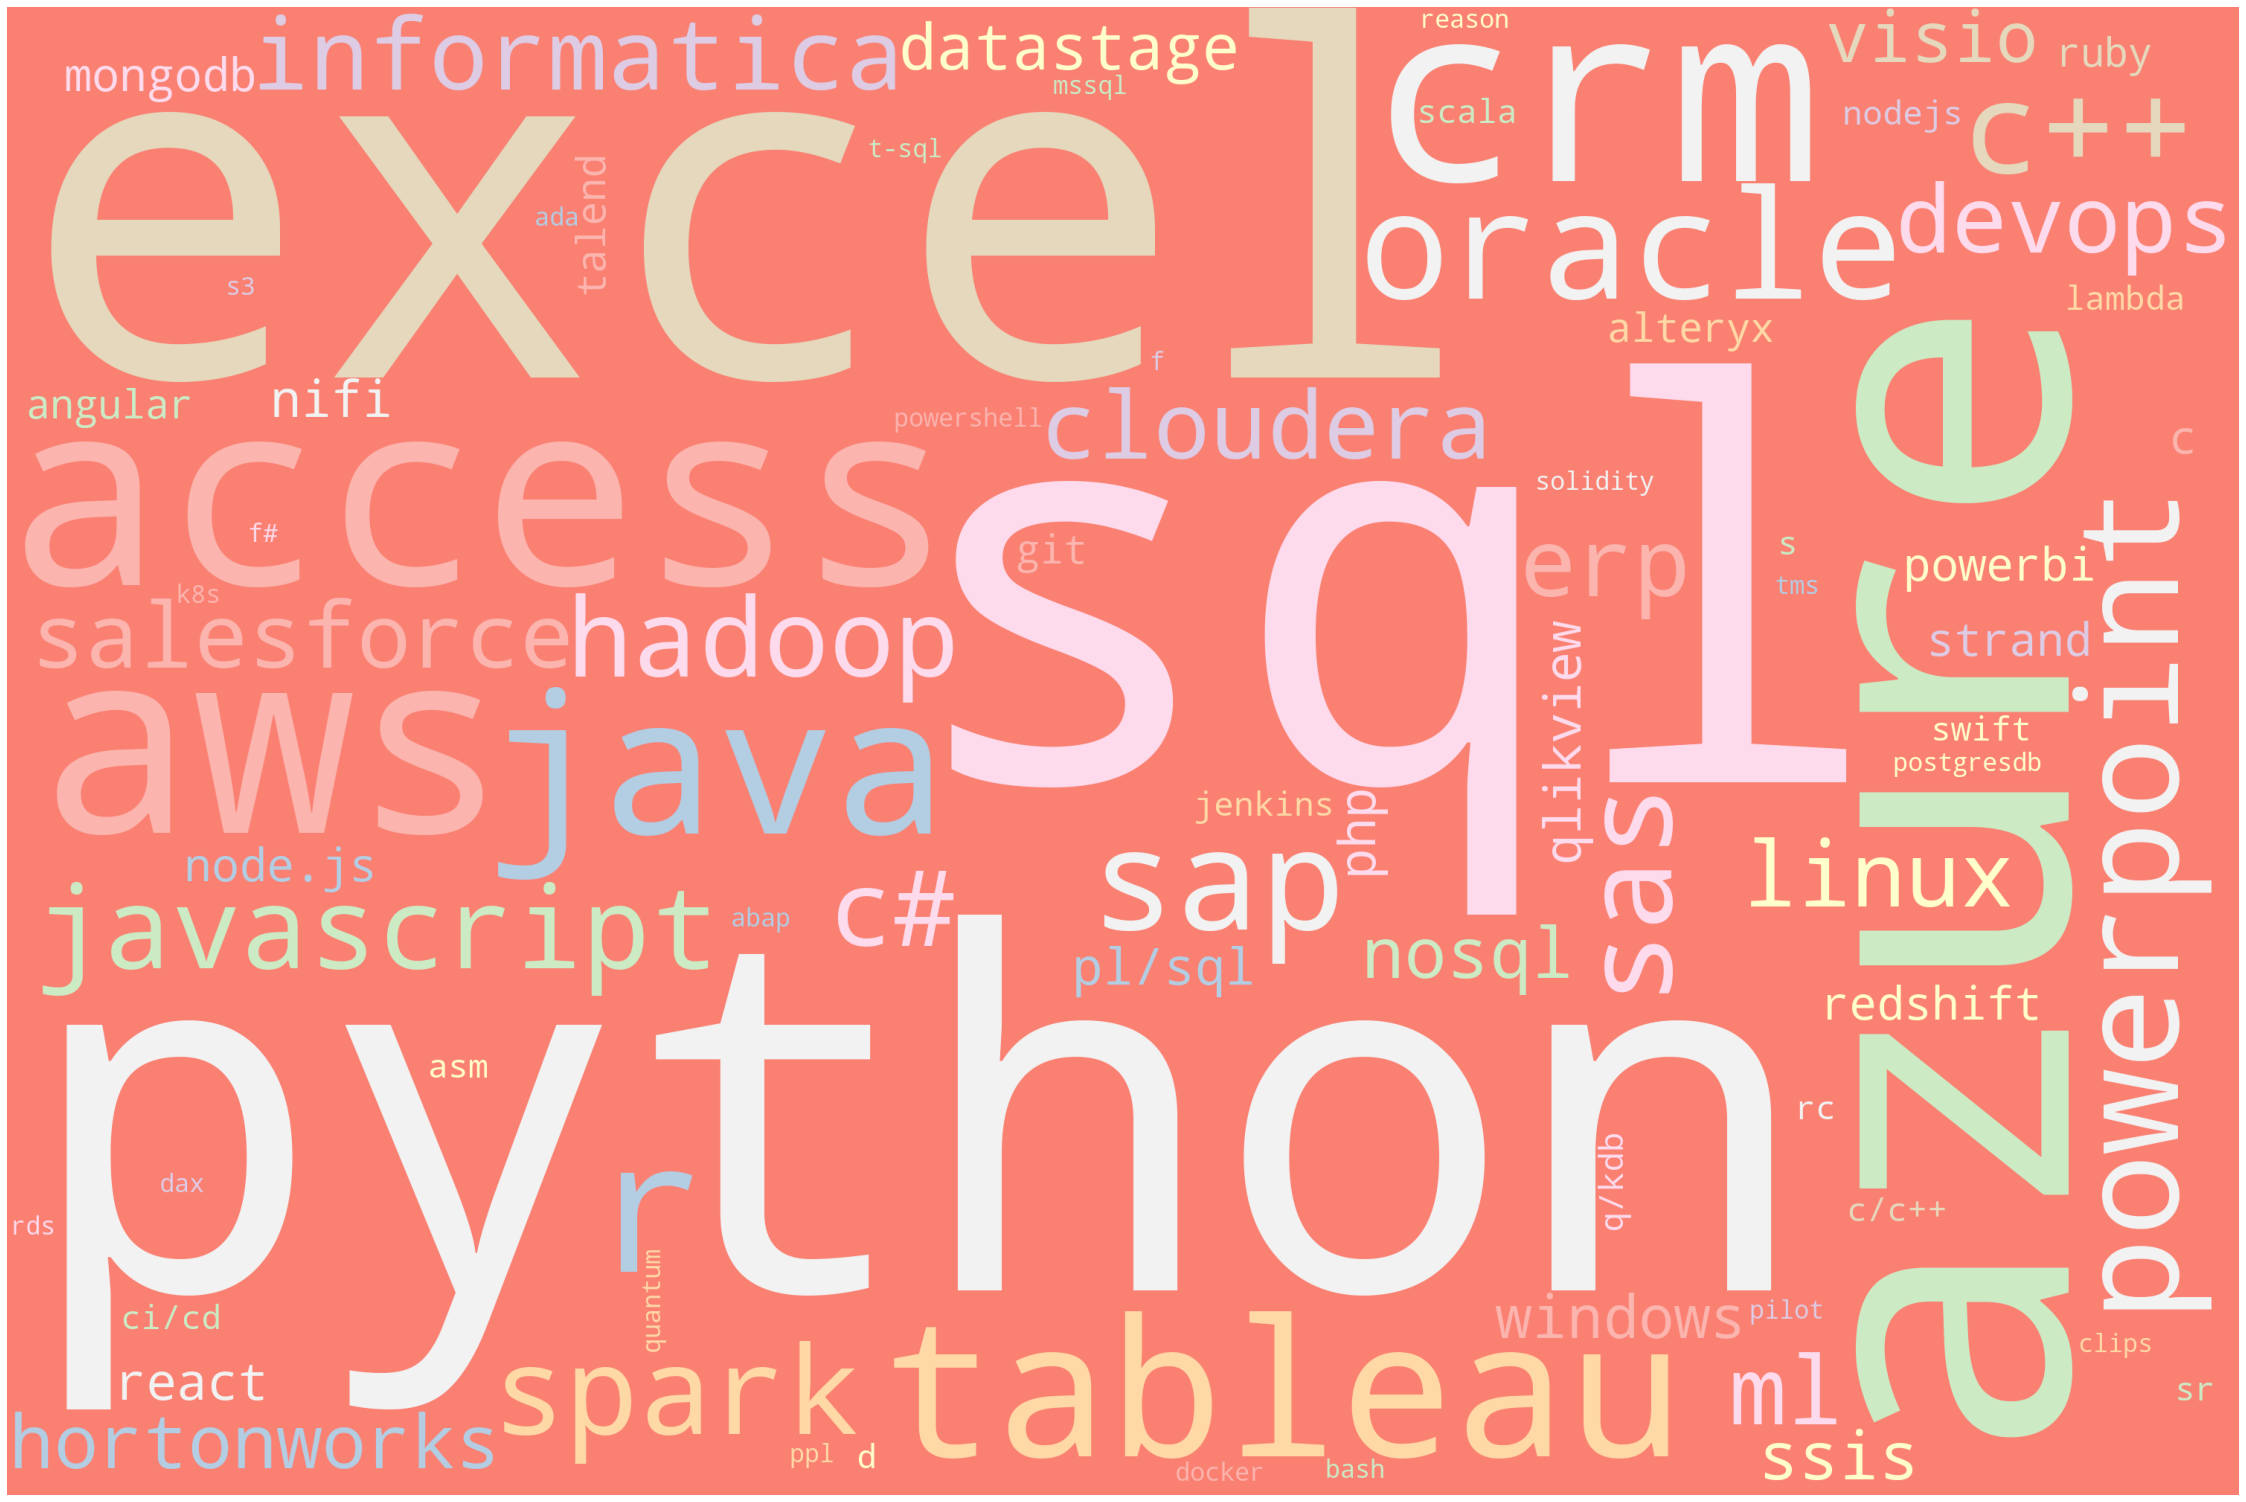

In [95]:
import re, csv
from wordcloud import WordCloud

tmp = df['jobDescription'].to_list() # update for different columns: JD_requirements, JD_role, jobDescription
mydict={}

for desc in tmp:
    tmp = specified_token(tools+coding, desc)  #action+role+skills+tools+coding : choose list of keywords to be included
    for k,v in tmp.items():
        mydict[k] = mydict.get(k,0) + v

# dictionary looped sort by value - for better display checking only
mydict = sorted(mydict.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
mydict = {item[0]: item[1] for item in mydict}
mydict


# Plot a word cloud for job title keywords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False).generate_from_frequencies(mydict)
plot_cloud(wordcloud)

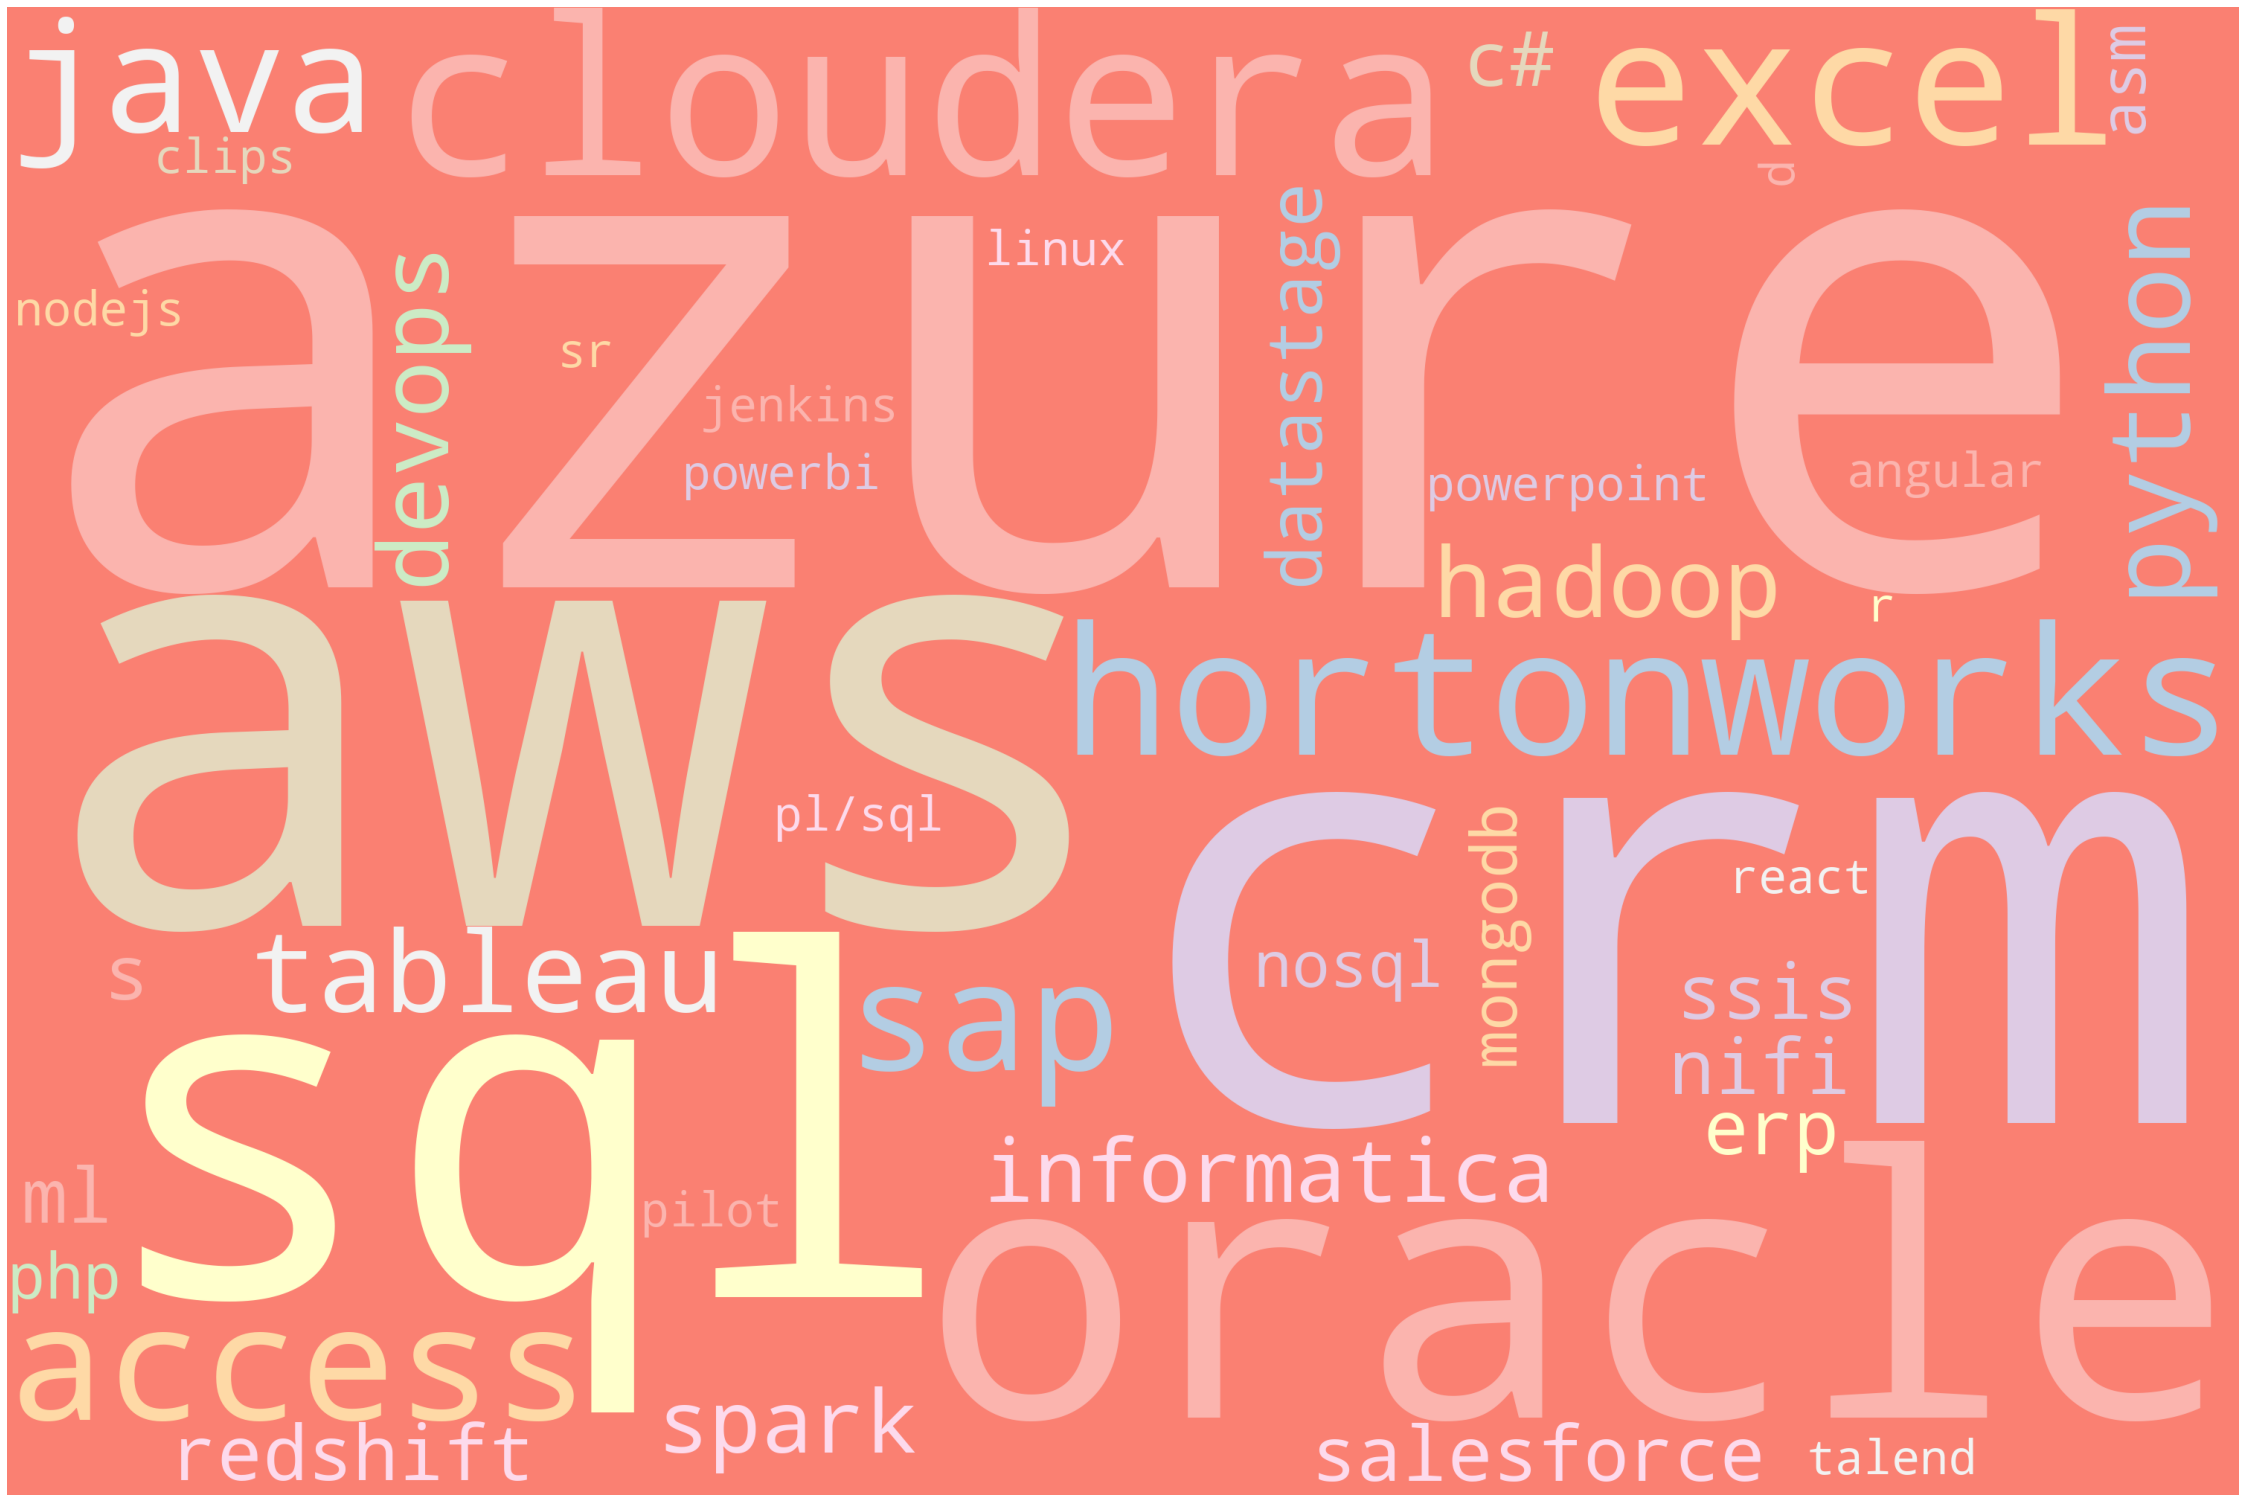

In [94]:
import re, csv
from wordcloud import WordCloud

tmp = df['JD_role'].to_list() # update for different columns: JD_requirements, JD_role, jobDescription
mydict={}

for desc in tmp:
    tmp = specified_token(tools+coding, desc)  #action+role+skills+tools+coding : choose list of keywords to be included
    for k,v in tmp.items():
        mydict[k] = mydict.get(k,0) + v

# dictionary looped sort by value - for better display checking only
mydict = sorted(mydict.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
mydict = {item[0]: item[1] for item in mydict}
mydict


# Plot a word cloud for job title keywords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False).generate_from_frequencies(mydict)
plot_cloud(wordcloud)

## Side Note: Analyse with CSV without pandas
open CSV file and convert to word list directly

In [ ]:
import re, csv
from wordcloud import WordCloud


dict = {}

token = 'split' # split, spacy, rake, yake, nltk
file = '20211003-1830-Indeed_detail.csv' #update filepath
output = '_'+token + '.png'
text = []

with open(file) as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        desc = row['jobDescription']
        text.append(desc)
        if token == "spacy":
            word_list = spacy_keywords(desc)
        elif token == "yake":
            word_list = yake_keywords(desc)
        elif token == "rake":
            word_list = rake_keywords(desc)
        elif token == "nltk":
            word_list = nltk_tokens(desc)
        else:
            word_list = simple_split(desc)

        #print(word_list)
        for word in word_list:
            word = str(word)
            word = re.sub('[^a-zA-Z0-9\n\']', ' ', word).lower().strip()
            if (word not in stop_words) & (word not in ignore_words) & (word != ''):
                # word = stemmer.stem(word)
                dict[word] = dict.get(word, 0) + 1

## sample code for sorting dictionary by value
# mydict = sorted(dict.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
# mydict = {item[0]: item[1] for item in mydict}